In [1]:
# Alcohol consumption vs. Life Expectancy

In [2]:
#%matplotlib notebook

In [3]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
csvpath=os.path.join("Resources", "life_expectancy_data_region.csv")
life_expectancy_df = pd.read_csv(csvpath)

In [5]:
# Review the counts for "  "Country", "Year", "Status", "life Expectancy" and Alcohol" 
# Take a look at the record counts for the columns needed for this project phase.
life_expectancy_df.head()

,Country,Year,Region,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Eastern Mediterranean,Developing,65.0,263.0,62,0.01,71.279624,65.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Eastern Mediterranean,Developing,59.9,271.0,64,0.01,73.523582,62.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Eastern Mediterranean,Developing,59.9,268.0,66,0.01,73.219243,64.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Eastern Mediterranean,Developing,59.5,272.0,69,0.01,78.184215,67.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Eastern Mediterranean,Developing,59.2,275.0,71,0.01,7.097109,68.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
life_expectancy_df.count()

Country                            2938
Year                               2938
Region                             2938
Status                             2938
Life expectancy                    2928
Adult Mortality                    2928
infant deaths                      2938
Alcohol                            2744
percentage expenditure             2938
Hepatitis B                        2385
Measles                            2938
 BMI                               2904
under-five deaths                  2938
Polio                              2919
Total expenditure                  2712
Diphtheria                         2919
 HIV/AIDS                          2938
GDP                                2490
Population                         2286
 thinness  1-19 years              2904
 thinness 5-9 years                2904
Income composition of resources    2771
Schooling                          2775
dtype: int64

In [7]:
# Drop any rows having missing information in the following columns: Country, Year, Region, Status, Alchohol 
life_expectancy_clean_df = life_expectancy_df.dropna(subset=["Country", "Year", "Region", "Status", "Life expectancy ", "Alcohol"])
                                                        
# Recheck the counts for the needed columns                                               
life_expectancy_clean_df.count()

Country                            2735
Year                               2735
Region                             2735
Status                             2735
Life expectancy                    2735
Adult Mortality                    2735
infant deaths                      2735
Alcohol                            2735
percentage expenditure             2735
Hepatitis B                        2205
Measles                            2735
 BMI                               2720
under-five deaths                  2735
Polio                              2728
Total expenditure                  2698
Diphtheria                         2728
 HIV/AIDS                          2735
GDP                                2328
Population                         2129
 thinness  1-19 years              2720
 thinness 5-9 years                2720
Income composition of resources    2584
Schooling                          2584
dtype: int64

In [8]:
# After dropping the rows with missing information in these columns, all fields have 2,735 rows


In [9]:
 # Rename fields to conform to the desired column header
life_expectancy_clean_df = life_expectancy_clean_df.rename(columns={"Life expectancy ": "Life Expectancy"})


In [10]:
#Extract the fields needed for the alcohol to life expectancy comparison
life_expectancy_clean_df = life_expectancy_clean_df[["Country", "Year", "Status", "Life Expectancy", "Alcohol"]]
life_expectancy_clean_df

,Country,Year,Status,Life Expectancy,Alcohol
0,Afghanistan,2015,Developing,65.0,0.01
1,Afghanistan,2014,Developing,59.9,0.01
2,Afghanistan,2013,Developing,59.9,0.01
3,Afghanistan,2012,Developing,59.5,0.01
4,Afghanistan,2011,Developing,59.2,0.01
...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,4.36
2934,Zimbabwe,2003,Developing,44.5,4.06
2935,Zimbabwe,2002,Developing,44.8,4.43
2936,Zimbabwe,2001,Developing,45.3,1.72


In [11]:
#Group by the Countries for ease of selection for comparison between Life Expectancy and Alcohol for all countries
group_by_country_df = life_expectancy_clean_df.groupby(["Country"]).mean()
group_country_df = group_by_country_df[["Life Expectancy", "Alcohol"]]
del group_by_country_df["Year"]
group_by_country_df.head()

 

,Life Expectancy,Alcohol
Country,,
Afghanistan,58.193750,0.014375
Albania,75.156250,4.848750
Algeria,73.486667,0.406667
Angola,48.793333,5.740667
Antigua and Barbuda,74.966667,7.949333


In [12]:
avg_life_exp = group_by_country_df["Life Expectancy"]
avg_life_exp

Country
Afghanistan                           58.193750
Albania                               75.156250
Algeria                               73.486667
Angola                                48.793333
Antigua and Barbuda                   74.966667
                                        ...    
Venezuela (Bolivarian Republic of)    73.340000
Viet Nam                              74.693333
Yemen                                 63.740000
Zambia                                53.380000
Zimbabwe                              49.386667
Name: Life Expectancy, Length: 182, dtype: float64

In [13]:
avg_alcohol = group_by_country_df["Alcohol"]
avg_alcohol


Country
Afghanistan                           0.014375
Albania                               4.848750
Algeria                               0.406667
Angola                                5.740667
Antigua and Barbuda                   7.949333
                                        ...   
Venezuela (Bolivarian Republic of)    7.420000
Viet Nam                              3.087333
Yemen                                 0.047333
Zambia                                2.239333
Zimbabwe                              4.482000
Name: Alcohol, Length: 182, dtype: float64

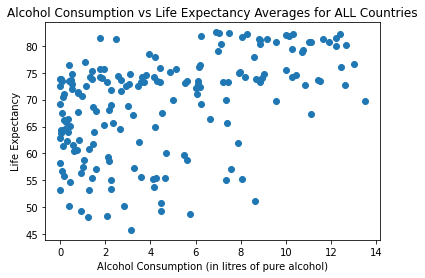

In [14]:
y_axis = avg_life_exp
x_axis = avg_alcohol
plt.scatter(x_axis, y_axis)


#Title and labels
plt.title("Alcohol Consumption vs Life Expectancy Averages for ALL Countries")
plt.xlabel("Alcohol Consumption (in litres of pure alcohol)")
plt.ylabel("Life Expectancy")

plt.show()
#plt.savefig("../Images/scatter_average_all_countries.png")                             ### PRINT TO A FILE ###


In [15]:
# Plot out Afghanistan(developing country) and Hungary(developed country)

life_expectancy_clean_df

,Country,Year,Status,Life Expectancy,Alcohol
0,Afghanistan,2015,Developing,65.0,0.01
1,Afghanistan,2014,Developing,59.9,0.01
2,Afghanistan,2013,Developing,59.9,0.01
3,Afghanistan,2012,Developing,59.5,0.01
4,Afghanistan,2011,Developing,59.2,0.01
...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,4.36
2934,Zimbabwe,2003,Developing,44.5,4.06
2935,Zimbabwe,2002,Developing,44.8,4.43
2936,Zimbabwe,2001,Developing,45.3,1.72


In [16]:
Afghanistan_developing_df = life_expectancy_clean_df.loc[(life_expectancy_clean_df["Country"] == "Afghanistan"), :]

del Afghanistan_developing_df["Status"]
del Afghanistan_developing_df["Country"]
del Afghanistan_developing_df["Year"]
Afghanistan_developing_df

,Life Expectancy,Alcohol
0,65.0,0.01
1,59.9,0.01
2,59.9,0.01
3,59.5,0.01
4,59.2,0.01
5,58.8,0.01
6,58.6,0.01
7,58.1,0.03
8,57.5,0.02
9,57.3,0.03


In [17]:
Afghanistan_life_e = Afghanistan_developing_df["Life Expectancy"]
Afghanistan_alcohol = Afghanistan_developing_df["Alcohol"]


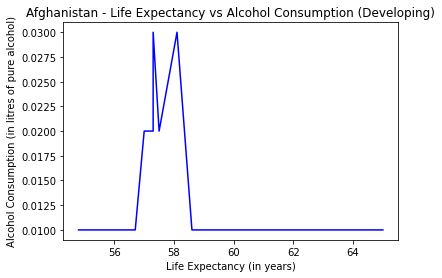

In [18]:
plt.plot(Afghanistan_life_e, Afghanistan_alcohol, color="blue")

#Title and labels
plt.title("Afghanistan - Life Expectancy vs Alcohol Consumption (Developing)")
plt.xlabel("Life Expectancy (in years)")
plt.ylabel("Alcohol Consumption (in litres of pure alcohol)")

plt.show()


In [19]:
Hungary_developed_df = life_expectancy_clean_df.loc[(life_expectancy_clean_df["Country"] == "Hungary"), :]

del Hungary_developed_df["Status"]
del Hungary_developed_df["Country"]
del Hungary_developed_df["Year"]

Hungary_developed_df

,Life Expectancy,Alcohol
1155,75.6,0.01
1156,75.5,10.88
1157,75.0,11.27
1158,74.8,11.51
1159,74.5,10.78
1160,74.2,11.46
1161,74.1,11.64
1162,73.5,12.55
1163,73.4,13.16
1164,72.9,12.94


In [20]:
Hungary_life_e = Hungary_developed_df["Life Expectancy"]
Hungary_alcohol = Hungary_developed_df["Alcohol"]

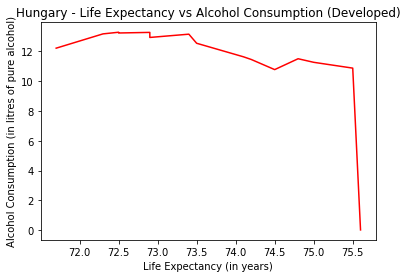

In [21]:
# There does not appear to be any correlation between the alcohol comsumption and age expectancy.
# Notice that the second spike is representative of the average age for the entire country. (approx. 58.19)
plt.plot(Hungary_life_e,Hungary_alcohol, color="red")

#Title and labels
plt.title("Hungary - Life Expectancy vs Alcohol Consumption (Developed)")
plt.xlabel("Life Expectancy (in years)")
plt.ylabel("Alcohol Consumption (in litres of pure alcohol)")

plt.show()